# Function to load as tar file extract csv file

In [ ]:
# import os
# import tarfile
# from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [ ]:
#since the csv dataset is in a compressed file, we are writing a function to automate the fetching csv data

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
        tgz_path = os.path.join(housing_path, "housing.tgz")
        urllib.request.urlretrieve(housing_url, tgz_path)
        housing_tgz = tarfile.open(tgz_path)
        housing_tgz.extractall(path=housing_path)
        housing_tgz.close()
        
# when you call fetch_housing_data() , it creates a datasets/housing directory in
# your workspace, downloads the housing.tgz file, and extracts the housing.csv from it in
# this directory.

fetch_housing_data()

In [ ]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

#This function returns a Pandas DataFrame object containing all the data.

In [ ]:
housing = load_housing_data()
housing.head()

#each row represents info about each district

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Loading the csv file in usual way

In [ ]:
import pandas as pd
import numpy as np

filename = 'https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv'
housing = pd.read_csv(filename)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
housing.info()


# Notice that the total_bed_ rooms attribute has only 20,433 non-null values, meaning that 207 districts are miss‐
# ing this feature. We will need to take care of this later.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
# All attributes are numerical, except the ocean_proximity field. Its type is object , so it
# could hold any kind of Python object, but since you loaded this data from a CSV file
# you know that it must be a text attribute. When you looked at the top five rows, you
# probably noticed that the values in the ocean_proximity column were repetitive,
# which means that it is probably a categorical attribute. You can find out what cate‐
# gories exist and how many districts belong to each category by using the
# value_counts() method:

housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
# The describe() method shows a summary of the numerical attributes

housing.describe()

# The std row shows the standard deviation, which measures how dispersed the values are.
# The 25%, 50%, and 75% rows show the corresponding percentiles: a percentile indicates the 
# value below which a given percentage of observations in a group of observa‐
# tions falls. For example, 25% of the districts have a housing_median_age lower than
# 18, while 50% are lower than 29 and 75% are lower than 37. These are often called the
# 25 th percentile (or 1 st quartile), the median, and the 75 th percentile (or 3 rd quartile)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Plotting histograms to visualize

Another quick way to get a feel of the type of data you are dealing with is to plot a histogram for each numerical attribute.

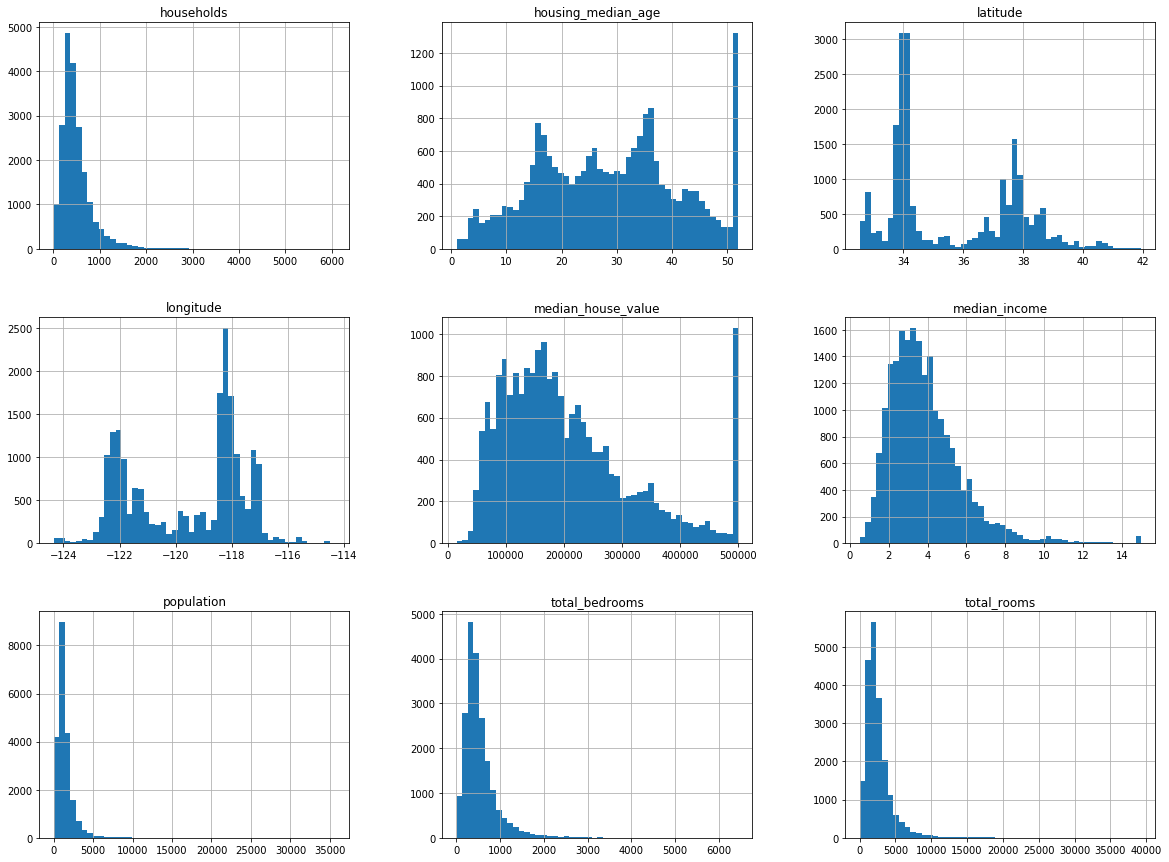

In [ ]:
#Another quick way to get a feel of the type of data you are dealing with is to plot a
#histogram for each numerical attribute.

# A histogram shows the number of instances
# (on the vertical axis) that have a given value range (on the horizontal axis). You can
# either plot this one attribute at a time, or you can call the hist() method on the
# whole dataset, and it will plot a histogram for each numerical attribute

%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show() #calling show() is optional in a Jupyter notebook, as Jupyter will automatically display plots when a cell is executed.

# The hist() method relies on Matplotlib, which in turn relies on a
# user-specified graphical backend to draw on your screen. So before
# you can plot anything, you need to specify which backend Matplot‐
# lib should use. The simplest option is to use Jupyter’s magic com‐
# mand %matplotlib inline . This tells Jupyter to set up Matplotlib
# so it uses Jupyter’s own backend. Plots are then rendered within the
# notebook itself.

Notice a few things in these histograms:

1) First, the median income attribute does not look like it is expressed in US dollars
(USD). After checking with the team that collected the data, you are told that the
data has been scaled and capped at 15 (actually 15.0001) for higher median
incomes, and at 0.5 (actually 0.4999) for lower median incomes. The numbers
represent roughly tens of thousands of dollars (e.g., 3 actually means about
$30,000). Working with preprocessed attributes is common in Machine Learning,
and it is not necessarily a problem, but you should try to understand how the
data was computed.

2. The housing median age and the median house value were also capped. The lat‐
ter may be a serious problem since it is your target attribute (your labels). Your
Machine Learning algorithms may learn that prices never go beyond that limit.
You need to check with your client team (the team that will use your system’s out‐
put) to see if this is a problem or not. If they tell you that they need precise pre‐
dictions even beyond $500,000, then you have mainly two options:
    a. Collect proper labels for the districts whose labels were capped.
    b. Remove those districts from the training set (and also from the test set, since
    your system should not be evaluated poorly if it predicts values beyond
    $500,000).

3. These attributes have very different scales. We will discuss this later in this chap‐
ter when we explore feature scaling.

4. Finally, many histograms are tail heavy: they extend much farther to the right of
the median than to the left. This may make it a bit harder for some Machine
Learning algorithms to detect patterns. We will try transforming these attributes
later on to have more bell-shaped distributions.

# Creating test set using random sampling

CREATE A TEST SET

Creating a test set is theoretically quite simple: just pick some instances randomly,
typically 20% of the dataset (or less if your dataset is very large)

In [ ]:
# Scikit-Learn provides a few functions to split datasets into multiple subsets in various ways. 
#The simplest function is train_test_split

from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

#here we are creating 20% of total data as test data. we use random_state parameter that allows us to set a 
# random number generator's seed so that it always generates same shuffled indices when load it in subsequesnt runs

# Using statified sampling to split train and test set

So far we have considered purely random sampling methods. This is generally fine if your dataset is large enough (especially relative to the number of attributes), but if it is not, you run the risk of introducing a significant sampling bias.
in such case, we use stratified sampling: the population is divided into homogeneous subgroups called strata,and the right number of instances is sampled from each stratum to guarantee that the test set is representative of the overall population.
Suppose median income is a very important attribute to predict median housing prices so you want to ensure that test set is representative of the various categories of incomes in the whole dataset.
Since the median income is a continuous numerical attribute, you first need to create an income category attribute.
so looking at the medin incone hiostpgram, most median income values are clustered around 1.5 to 6 (ie $15,000–$60,000) but some median incomes go far beyond 6.

It is important to have  sufficient number of instances in your dataset for each stratum, or else the estimate
of the stratum’s importance may be biased. This means that you should not have too many strata, and each stratum should be large enough.

In [ ]:
# The following code uses the
# pd.cut() function to create an income category attribute with 5 categories (labeled from 1 to 5)
# category 1 ranges from 0 to 1.5 (i.e., less than $15,000), category 2 from 1.5 to 3, and so on:


housing["income_cat"] = pd.cut(housing["median_income"],
bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
labels=[1, 2, 3, 4, 5])


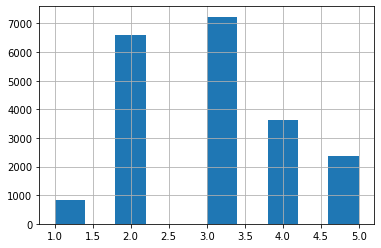

In [ ]:
housing['income_cat'].hist()

In [ ]:
# Now you are ready to do stratified sampling based on the income category. For this
# you can use Scikit-Learn’s StratifiedShuffleSplit class

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [ ]:
# Let’s see if this worked as expected.

strat_test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN,5
10970,-117.86,33.77,39.0,4159.0,655.0,1669.0,651.0,4.6111,240300.0,<1H OCEAN,4
20351,-119.05,34.21,27.0,4357.0,926.0,2110.0,876.0,3.0119,218200.0,<1H OCEAN,3
6568,-118.15,34.20,52.0,1786.0,306.0,1018.0,322.0,4.1518,182100.0,INLAND,3
13285,-117.68,34.07,32.0,1775.0,314.0,1067.0,302.0,4.0375,121300.0,INLAND,3


In [ ]:
strat_test_set["income_cat"].value_counts()

3    1447
2    1316
4     728
5     473
1     164
Name: income_cat, dtype: int64

In [ ]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

# thus we made it sure that there are sufficient number of instances in your dataset for each stratum,

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [ ]:
# further we can compare the income category proportions in the overall dataset, in
# the test set generated with stratified sampling, and in a test set generated using purely random sampling. 
# the test set generated using stratified sampling has income category proportions 
#almost identical to those in the full dataset. but the code for showing the comparison table is not given in book

# Removing income category attribute and back to original state

so we have created the train and test data wthout causing sampling bias to the median income parameter since that is very important in our prediction.
Now you should remove the income_cat attribute so the data is back to its original state:

In [ ]:

for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

We spent quite a bit of time on test set generation for a good reason: this is an often
neglected but critical part of a Machine Learning project. Moreover, many of these
ideas will be useful later when we discuss cross-validation. Now it’s time to move on
to the next stage: exploring the data.

# Discover and Visualize the Data to Gain Insights

so far we took a quick glance on data, here lets go in depth.
First, make sure you have put the test set aside and you are only exploring the training set

In [ ]:
housing = strat_train_set.copy()

In [ ]:
housing.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN


Visualizing Geographical Data

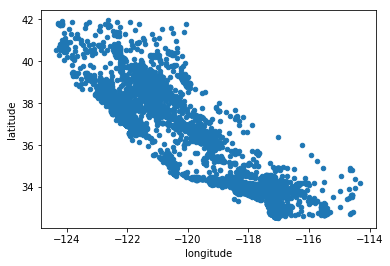

In [ ]:
#since there is geo information, using sactter plot to visualize the data
housing.plot(kind="scatter", x="longitude", y="latitude")

This looks like California all right, but other than that it is hard to see any particular
pattern. Setting the alpha option to 0.1 makes it much easier to visualize the places
where there is a high density of data point

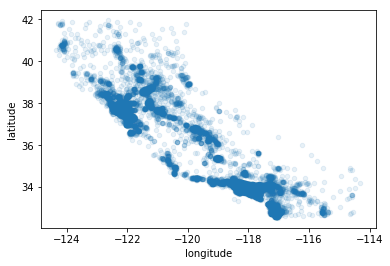

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha = 0.1)

Now that’s much better: you can clearly see the high-density areas, namely the Bay
Area and around Los Angeles and San Diego,

Looking for Correlations

Since the dataset is not too large, you can easily compute the standard correlation coefficient (also called Pearson coeff)

In [ ]:
corr_matrix = housing.corr()

corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

The correlation coefficient ranges from –1 to 1. When it is close to 1, it means that
there is a strong positive correlation; for example, the median house value tends to go
up when the median income goes up. When the coefficient is close to –1, it means
that there is a strong negative correlation; you can see a small negative correlation
between the latitude and the median house value (i.e., prices have a slight tendency to
go down when you go north). Finally, coefficients close to zero mean that there is no
linear correlation.

Another way to check for correlation between attributes is to use Pandas’
scatter_matrix function, which plots every numerical attribute against every other
numerical attribute. Since there are now 11 numerical attributes, you would get 11 * 1 = 121 plots
so just focusssing on some promising attributes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8fbecb9940>,
      dtype=object)

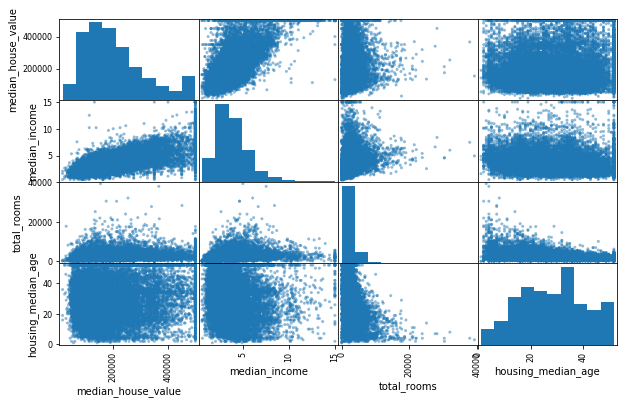

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms","housing_median_age"]
scatter_matrix(housing[attributes], figsize = (10,6))

The most promising attribute to predict the median house value is the median income,so lets focus on that scatterplt

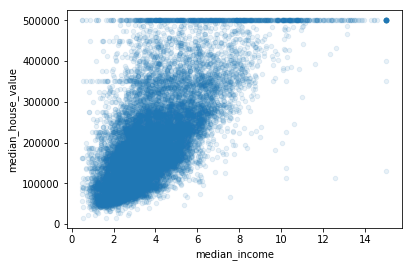

In [ ]:
housing.plot(kind='scatter', x="median_income", y="median_house_value",alpha=0.1)




This plot reveals a few things. First, the correlation is indeed very strong; you can
clearly see the upward trend and the points are not too dispersed. Second, the price
cap that we noticed earlier is clearly visible as a horizontal line at 500,000. 
But this plot reveals other less obvious straight lines: a horizontal line around 450,000,
another around 350,000, perhaps one around 280,000, and a few more below that.
You may want to try removing the corresponding districts to prevent your algorithms
from learning to reproduce these data quirks.

# Experimenting with Attribute Combinations

Hopefully the previous sections gave you an idea of a few ways you can explore the
data and gain insights. You identified a few data quirks that you may want to clean up
before feeding the data to a Machine Learning algorithm, and you found interesting
correlations between attributes, in particular with the target attribute. You also
noticed that some attributes have a tail-heavy distribution, so you may want to trans‐
form them (e.g., by computing their logarithm)

one last thing we can do is try out various attribute combinations.
For example, the total number of rooms in a district is not very useful if you don’t know how many
households there are. What you really want is the number of rooms per household.
Similarly, the total number of bedrooms by itself is not very useful: you probably
want to compare it to the number of rooms. And the population per household also
seems like an interesting attribute combination to look at. Let’s create these new
attributes:



In [ ]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [ ]:
housing.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,4.625369,0.223852,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,6.008850,0.159057,2.707965


In [ ]:
#And now let’s look at the correlation matrix again:

corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)








median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

The new bedrooms_per_room attribute is much more correlated with
the median house value than the total number of rooms or bedrooms. Apparently
houses with a lower bedroom/room ratio tend to be more expensive. The number of
rooms per household is also more informative than the total number of rooms in a
district—obviously the larger the houses, the more expensive they are.

**so far we quickly gain insights about the data. since its an iterative process, we will come back to EDA after analyzing the output**

#Prepare the Data for Machine Learning Algorithms

lets do cleaning of training set first (by copying strat_train_set once again),
and let’s separate the predictors and the labels since we don’t necessarily want to apply
the same transformations to the predictors and the target values (note that drop()
creates a copy of the data and does not affect strat_train_set ):

In [ ]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [ ]:
strat_train_set.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN


In [ ]:
housing.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN


In [ ]:
housing_labels.head(2)

17606    286600.0
18632    340600.0
Name: median_house_value, dtype: float64



---

---





Data cleaning

let's work on the attributes with missing features. noticed earlier that the total_bedrooms
attribute has some missing values, so let’s fix this. we have 3 options:

• Get rid of the corresponding districts.
• Get rid of the whole attribute.
• Set the values to some value (zero, the mean, the median, etc.).
You can accomplish these easily using DataFrame’s dropna() , drop() , and fillna()
methods:

housing.dropna(subset=["total_bedrooms"]) 


1.   option 1 - housing.drop("total_bedrooms", axis=1)
2.   option 2 - median = housing["total_bedrooms"].median()
3.   option 3 - housing["total_bedrooms"].fillna(median, inplace=True)




If you choose option 3, you should compute the median value on the training set, and use it to fill the missing values in the training set

scikit learn provides a class SimpleImputer to handle missing values, lets use it.
firstly need to create a SimpleImputer instance, specifying
that you want to replace each attribute’s missing values with the median of that attribute:

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'median')

In [ ]:
# Since the median can only be computed on numerical attributes, we need to create a
# copy of the data without the text attribute ocean_proximity
housing_num = housing.drop("ocean_proximity", axis=1)

#Now you can fit the imputer instance to the training data using the fit() method:
imputer.fit(housing_num)


SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

The imputer has simply computed the median of each attribute and stored the result
in its statistics_ instance variable. Only the total_bedrooms attribute had missing values, 
but we cannot be sure that there won’t be any missing values in new data after system goes live, hence computing median of all num attribut

In [ ]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [ ]:
# now we can use the imputer to transform training set by replacing missing values by computed medians

X = imputer.transform(housing_num)

X

array([[-121.89  ,   37.29  ,   38.    , ...,  710.    ,  339.    ,
           2.7042],
       [-121.93  ,   37.05  ,   14.    , ...,  306.    ,  113.    ,
           6.4214],
       [-117.2   ,   32.77  ,   31.    , ...,  936.    ,  462.    ,
           2.8621],
       ...,
       [-116.4   ,   34.09  ,    9.    , ..., 2098.    ,  765.    ,
           3.2723],
       [-118.01  ,   33.82  ,   31.    , ..., 1356.    ,  356.    ,
           4.0625],
       [-122.45  ,   37.77  ,   52.    , ..., 1269.    ,  639.    ,
           3.575 ]])

In [ ]:
# the result is a numpy array containg transformed features. if want to put it back as a dataframe,

housing_tr = pd.DataFrame(X, columns=housing_num.columns)

housing_tr.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214


In [ ]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.0 MB


**Handling Text and Categorical Attributes**

let's work with cat attribute ocean_proximity

In [ ]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head(5)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN


Most Machine Learning algorithms prefer to work with numbers anyway, so let’s convert these categories from text to numbers. For this, we can use Scikit-Learn’s OrdinalEncoder class:

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

In [ ]:
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [ ]:
housing_cat_encoded.shape

(16512, 1)

In [ ]:
type(housing_cat_encoded)

numpy.ndarray

In [ ]:
# so using ordinal encoder, we converted the caregories as numbers. below we are slicing first 0 to 9 index values in the array
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [ ]:
#You can get the list of categories using the categories_ instance variable
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

1 issue with this representation is that ML algorithms will assume that two nearby values are more similar than two distant values. This may be fine in some cases is in ordinal data (e.g.,for ordered categories such as “bad”, “average”, “good”, “excellent”). To solve this issue, for nominal data we use one hot encoding as encoding technique(expalined in notebook from krish naik video). 

In [ ]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

o/p is a sparse matrix. after 1 hot encoding we get a matrix with thousands of cols and matrix is full of zero except for a single 1 per row. You can use it mostly like a normal 2D array, 21 but if you really want to convert it to a (dense) NumPy array, just call the toarray method:

In [ ]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [ ]:
#you can get the list of categories using the encoder’s categories_ instance variable
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

**Feature scaling**
ML algos dont perforn well when input numerical attributes hav diff scales. in our data, total no. of rooms ranges from about 6 to 39320 while median income ranges from 0 to 15.

2 common ways of featre scaling - min-max scaling (normalization), standardization

In normalization, values are shifted and rescaled so that they end up ranging from 0 to 1. scikit learn has trabsformer called MinMaxScaler for this. 
It has a feature_range hyperparameter that lets you change the range if you don’t want 0–1 for some reason.

Standardization is first it subtracts the mean value (so standardized
values always have a zero mean), and then it divides by the standard deviation so that
the resulting distribution has unit variance. Unlike min-max scaling, standardization
does not bound values to a specific range, which may be a problem for some algo‐
rithms (e.g., neural networks often expect an input value ranging from 0 to 1)

Min-max scaling would then crush all the other values from 0–15 down to 0–0.15, whereas standardization would not be
much affected. Scikit-Learn provides a transformer called StandardScaler for standardization.

**Transformation Pipelines**

As we did, there are many data transformation steps that need to be executed in the right order. Fortunately, Scikit-Learn provides the Pipeline class to help with such sequences of transformations. Here is a small pipeline for the numerical attributes:

In [ ]:
# custom transformer for adding extra attributes
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, household_ix = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([('imputer', SimpleImputer(strategy="median")),
                         ('attribs_adder', CombinedAttributesAdder()),
                         ('std_scaler', StandardScaler()),])

housing_num_tr = num_pipeline.fit_transform(housing_num)

When you call the pipeline’s fit() method, it calls fit_transform() sequentially on all transformers, passing the output of each call as the parameter to the next call, until it reaches the final estimator, for which it just calls the fit() method.


So far, we have handled the categorical columns and the numerical columns separately. It would be more convenient to have a single transformer able to handle all columns, applying the appropriate transformations to each column. In version 0.20,Scikit-Learn introduced the ColumnTransformer for this purpose, and the good news is that it works great with Pandas DataFrames. Let’s use it to apply all the transformations to the housing data:

In [ ]:
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
                                  ("num", num_pipeline, num_attribs),
                                  ("cat", OneHotEncoder(), cat_attribs),
                                  ])

housing_prepared = full_pipeline.fit_transform(housing)



Here is how this works: first we import the ColumnTransformer class, next we get the
list of numerical column names and the list of categorical column names, and we
construct a ColumnTransformer . The constructor requires a list of tuples, where each
tuple contains a name , a transformer and a list of names (or indices) of columns
that the transformer should be applied to. In this example, we specify that the numer‐
ical columns should be transformed using the num_pipeline that we defined earlier,
and the categorical columns should be transformed using a OneHotEncoder . Finally,
we apply this ColumnTransformer to the housing data: it applies each transformer to
the appropriate columns and concatenates the outputs along the second axis (the
transformers must return the same number of rows).

**Select and train the model**

Now we have the prepared data. you sampled a training and a test set you wrote transformation pipelines to clean up and
prepare your data for Machine Learning algorithms automatically.

In [ ]:
# Training and Evaluating on the Training Set
# Let’s first train a Linear Regression model

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

#now we have a working linear reg model


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Let’s try it out on a few instances from the training set:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [ ]:
# Let’s measure this regression model’s RMSE on the whole training set using Scikit-Learn’s mean_squared_error function:

from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

Okay, this is better than nothing but clearly not a great score: most districts’
median_housing_values range between $120,000 and $265,000, so a typical prediction error of $68,628 is not very satisfying. This is an example of a model underfitting
the training data. When this happens it can mean that the features do not provide
enough information to make good predictions, or that the model is not powerful
enough.

**Let’s train a DecisionTreeRegressor . This is a powerful model, capable of finding complex nonlinear relationships in the data**


In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

No error at all? Could this model really be absolutely perfect? Of course,
it is much more likely that the model has badly overfit the data. How can you be sure?
As we saw earlier, you don’t want to touch the test set until you are ready to launch a
model you are confident about, so you need to use part of the training set for train‐
ing, and part for model validation.




**Better Evaluation Using Cross-Validation**

One way to evaluate the Decision Tree model would be to use the train_test_split
function to split the training set into a smaller training set and a validation set, then
train your models against the smaller training set and evaluate them against the validation
set. but thats a lengthy process and difficult. alternative to this is to use to use Scikit-Learn’s K-fold cross-validation feature

In [ ]:
# The below code randomly splits the training set into 10 distinct subsets called folds, then it
# trains and evaluates the Decision Tree model 10 times, picking a different fold for evaluation every time and training on the other 9 folds. 
# The result is an array containing the 10 evaluation scores:

from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)



Scikit-Learn’s cross-validation features expect a utility function (greater is better) rather than a cost function (lower is better), so
the scoring function is actually the opposite of the MSE (i.e., a negative value), which is why the preceding code computes -scores
before calculating the square root.

In [ ]:
#lets check results
def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())
display_scores(tree_rmse_scores)

Scores: [68231.31472156 67627.26368758 70077.24065068 69107.85841194
 70875.42497039 75028.88018668 70600.81810647 70494.11494985
 76995.1495372  69105.35202093]
Mean: 70814.34172432795
Standard deviation: 2816.4185122176577





Now Decision Tree doesn’t look as good as it did earlier. In fact, it seems to perform worse than the Linear Regression model. Notice that cross-validation allows you to get not only an estimate of the performance of your model, but also a measure of how precise this estimate is (i.e., its standard deviation). The Decision Tree has a score of approximately 71,407, generally ±2,439.

lets try with one last model - RF. Random Forests work by training many Decision Trees on random subsets of
the features, then averaging out their predictions. Building a model on top of many
other models is called Ensemble Learning

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Similarly you should try with many algos . The goal is to shortlist a few
(two to five) promising models.

You should save every model you experiment with, so you can
come back easily to any model you want. Make sure you save both
the hyperparameters and the trained parameters, as well as the
cross-validation scores and perhaps the actual predictions as well.
This will allow you to easily compare scores across model types,
and compare the types of errors they make. 



You can easily save
Scikit-Learn models by using Python’s pickle module, or using
sklearn.externals.joblib , which is more efficient at serializing
large NumPy arrays:

In [ ]:
from sklearn.externals import joblib
joblib.dump(my_model, "my_model.pkl")
my_model_loaded = joblib.load("my_model.pkl")